# Comparison of half-space solutions (f- and t-domain)

Comparing `analytical` with `dipole` for a half-space and a fullspace-solution, where `dipole` internally uses `kernel.fullspace` for the fullspace solution (`xdirect=True`), and `analytical` uses internally `kernel.halfspace`.

In [1]:
import numpy as np                                  # NumPy
import matplotlib.pyplot as plt                     # Matplotlib

from empymod import dipole, analytical, utils       # Load required empymod functions

In [2]:
# Style adjustments
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

## Time Domain

In [3]:
src = [0, 0, 100]
rec = [2000, 500, 200]
res = [2e14, 2.5]
aniso = [1, 2]
t = np.logspace(-2, 3, 301)

# Collect parameters
inpEM = {'src': src, 'rec': rec, 'freqtime': t, 'verb': 0}
modHS = {'res': res, 'aniso': aniso}
modFS = {'res': res[1], 'aniso': aniso[1]}

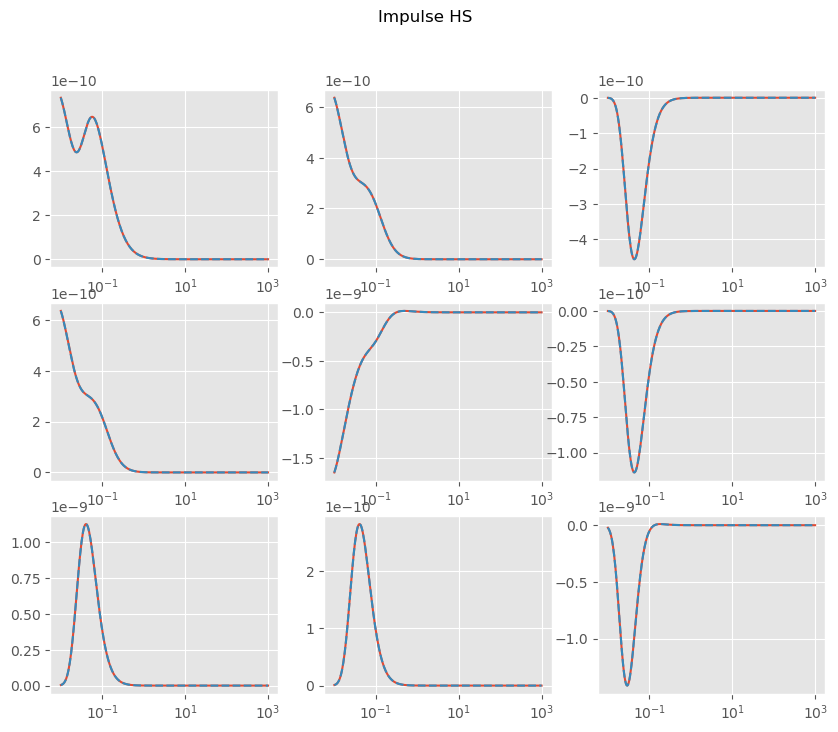

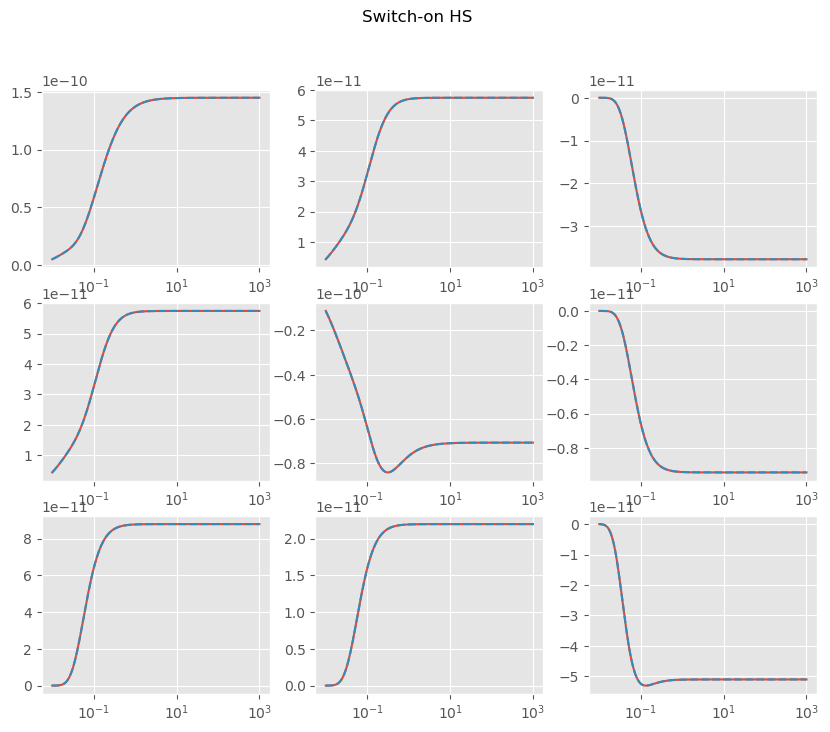

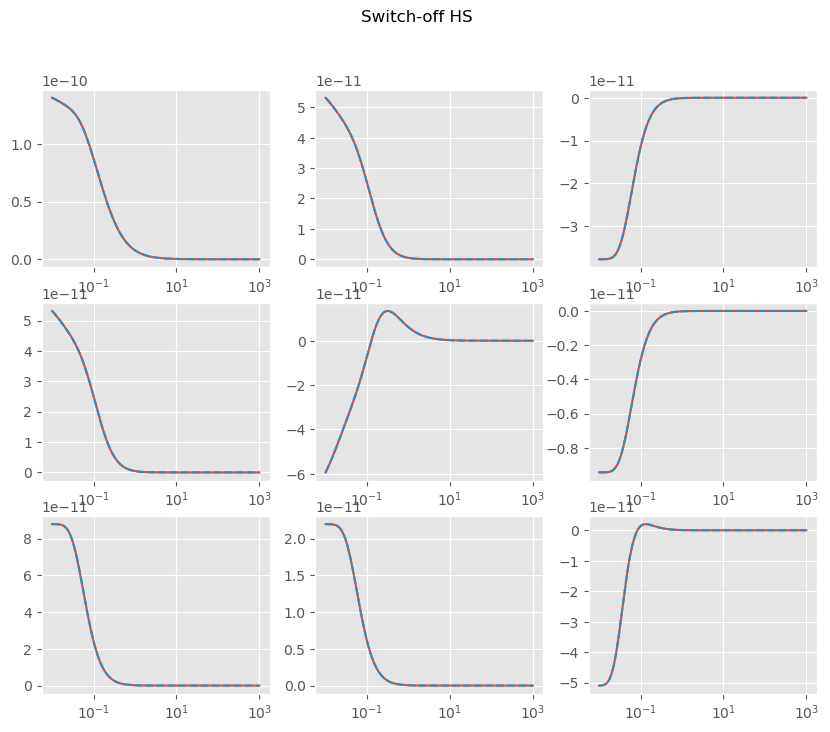

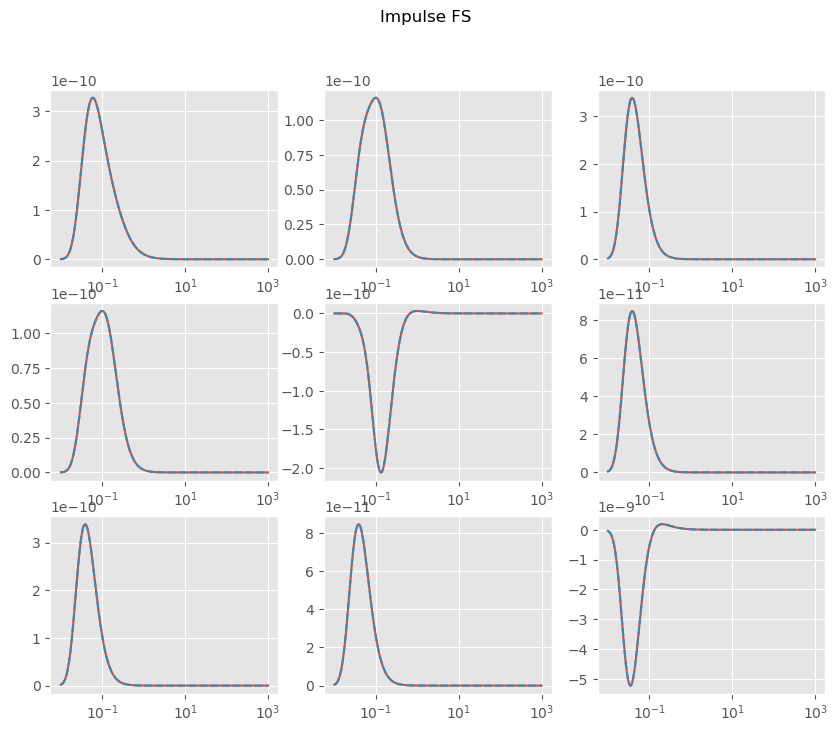

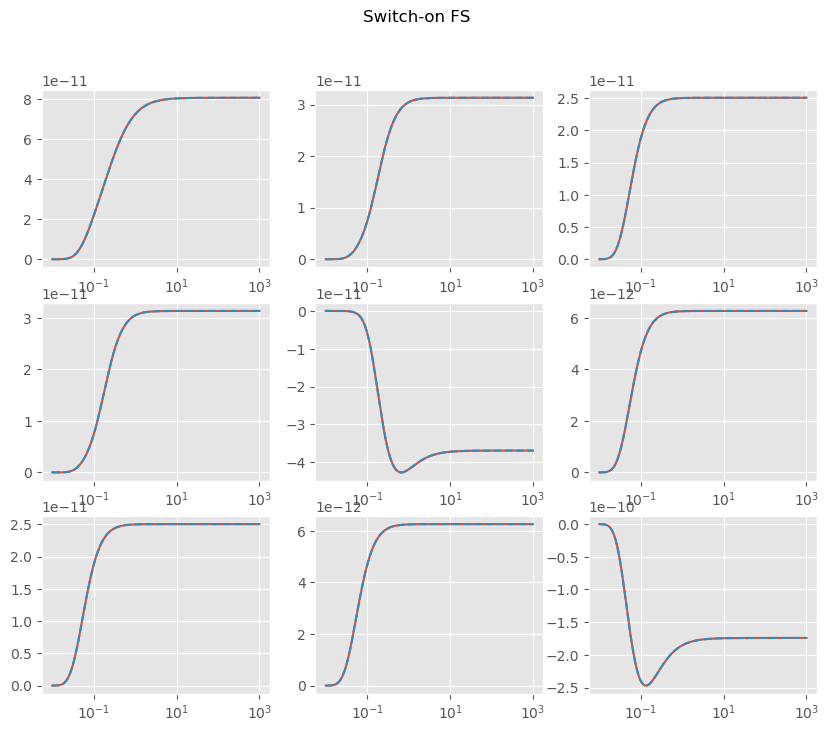

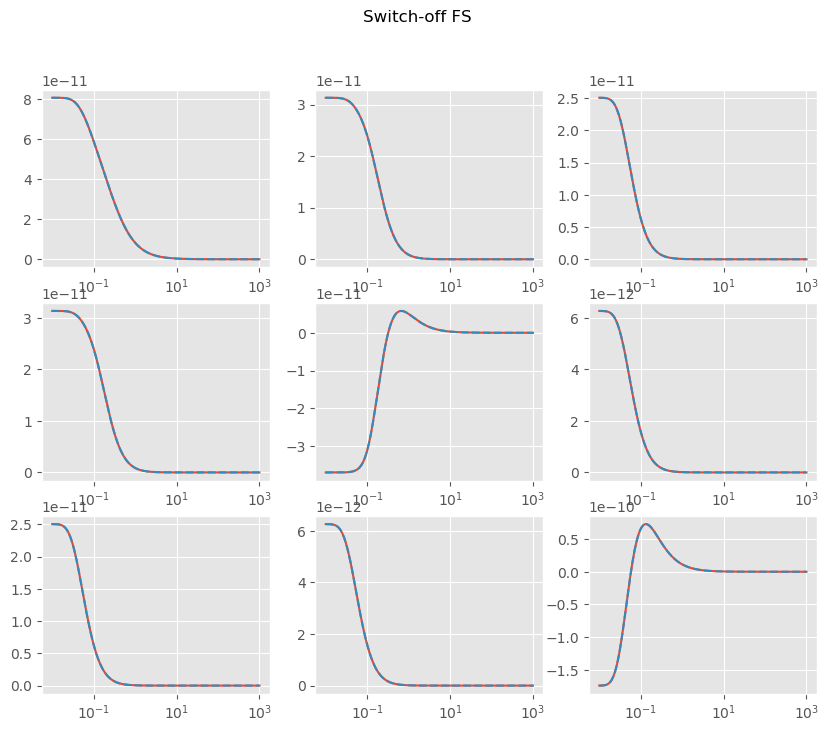

In [4]:
def plot_t(EM, HS, title, i):
    plt.figure(title, figsize=(10, 8))
    plt.subplot(i)
    plt.semilogx(t, EM)
    plt.semilogx(t, HS, '--')  
    
i = 330
for ab in [11, 12, 13, 21, 22, 23, 31, 32, 33]:
    i += 1
    
    ### Halfspace
    
    # Impulse
    EM = dipole(**inpEM, **modHS, ab=ab, signal=0, depth=0)
    HS = analytical(**inpEM, **modFS, solution='dhs', ab=ab, signal=0)
    plot_t(EM, HS, 'Impulse HS', i)
    
    # Switch-on
    EM = dipole(**inpEM, **modHS, ab=ab, signal=1, depth=0)
    HS = analytical(**inpEM, **modFS, solution='dhs', ab=ab, signal=1)
    plot_t(EM, HS, 'Switch-on HS', i)
    
    # Switch-on
    EM = dipole(**inpEM, **modHS, ab=ab, signal=-1, depth=0)
    HS = analytical(**inpEM, **modFS, solution='dhs', ab=ab, signal=-1)
    plot_t(EM, HS, 'Switch-off HS', i)

    ###  Fullspace
    
    # Impulse
    EM = dipole(**inpEM, **modFS, ab=ab, signal=0, depth=[])
    HS = analytical(**inpEM, **modFS, solution='dfs', ab=ab, signal=0)
    plot_t(EM, HS, 'Impulse FS', i)
    
    # Switch-on
    EM = dipole(**inpEM, **modFS, ab=ab, signal=1, depth=[])
    HS = analytical(**inpEM, **modFS, solution='dfs', ab=ab, signal=1)
    plot_t(EM, HS, 'Switch-on FS', i)
    
    # Switch-on
    EM = dipole(**inpEM, **modFS, ab=ab, signal=-1, depth=[])
    HS = analytical(**inpEM, **modFS, solution='dfs', ab=ab, signal=-1)
    plot_t(EM, HS, 'Switch-off FS', i)

plt.figure('Impulse HS')
plt.suptitle('Impulse HS')
plt.figure('Switch-on HS')
plt.suptitle('Switch-on HS')
plt.figure('Switch-off HS')
plt.suptitle('Switch-off HS')
plt.figure('Impulse FS')
plt.suptitle('Impulse FS')
plt.figure('Switch-on FS')
plt.suptitle('Switch-on FS')
plt.figure('Switch-off FS')
plt.suptitle('Switch-off FS')

plt.show()

## Frequency domain

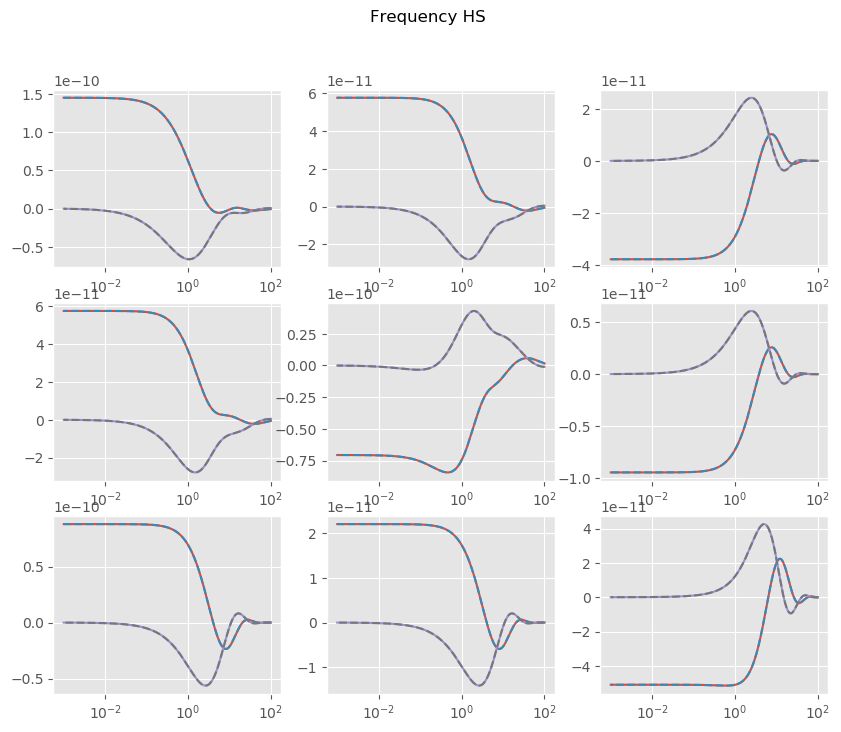

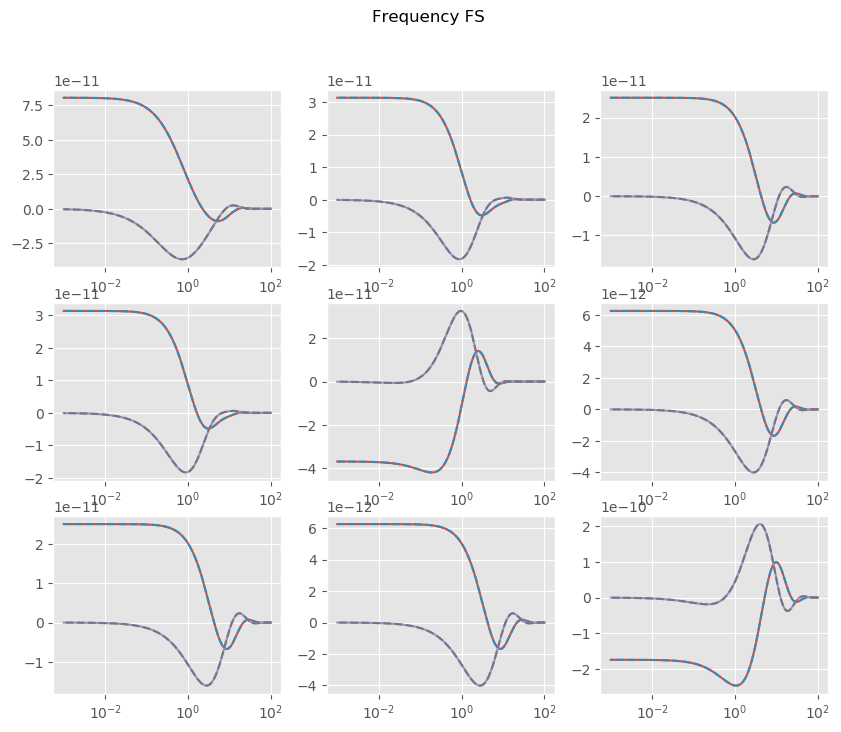

In [5]:
inpEM['freqtime'] = 1/t

def plot_f(EM, HS, title, i):
    plt.figure(title, figsize=(10, 8))
    plt.subplot(i)
    plt.semilogx(1/t, EM.real)
    plt.semilogx(1/t, HS.real, '--')
    plt.semilogx(1/t, EM.imag)
    plt.semilogx(1/t, HS.imag, '--')

i = 330
for ab in [11, 12, 13, 21, 22, 23, 31, 32, 33]:
    i += 1
    
    ### Halfspace
    EM = dipole(**inpEM, **modHS, ab=ab, depth=0)
    HS = analytical(**inpEM, **modFS, solution='dhs', ab=ab)
    plot_f(EM, HS, 'Frequency HS', i)

    ###  "Fullspace"
    EM = dipole(**inpEM, **modFS, ab=ab, depth=[])
    HS = analytical(**inpEM, **modFS, solution='dfs', ab=ab)
    plot_f(EM, HS, 'Frequency FS', i)
    

plt.figure('Frequency HS')
plt.suptitle('Frequency HS')
plt.figure('Frequency FS')
plt.suptitle('Frequency FS')
plt.show()

In [6]:
from empyscripts import versions
versions('HTML')